### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### EDA steps

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.describe(include=object)

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


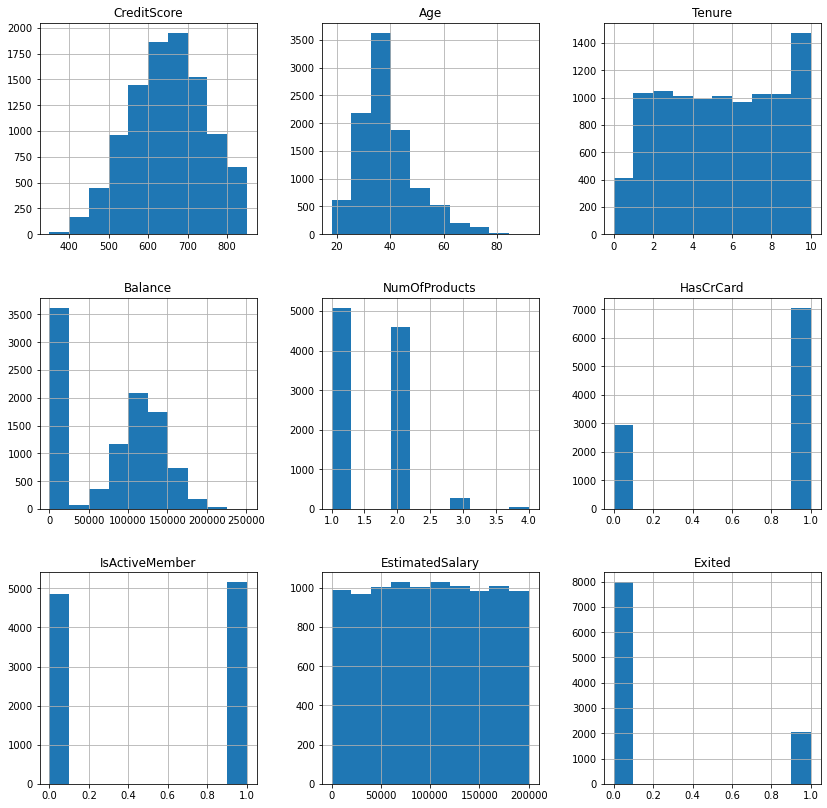

In [10]:
df.hist(figsize=(14,14))

plt.show()

In [11]:
grouped = df.groupby('Gender')['Exited'].agg(Count='value_counts')
grouped

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [12]:
dfgc = grouped
dfgc = dfgc.pivot_table(values='Count', index='Gender', columns=['Exited'])
dfgc

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [13]:
dfgp = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgp.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgp

Percentage
Gender Exited            
Female 0            74.93
       1            25.07
Male   0            83.54
       1            16.46

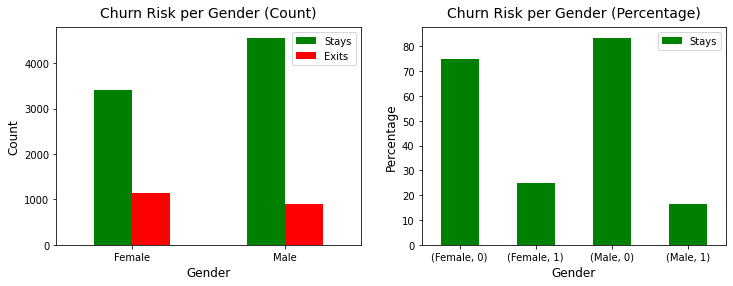

In [14]:
labels= ['Stays', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dfgc.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Gender', size=12)


dfgp.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Gender', size=12)

plt.show()

In [15]:
dfgeoc = df.groupby('Geography')['Exited'].agg(Count='value_counts')
dfgeoc = dfgeoc.pivot_table(values='Count', index='Geography', columns=['Exited'])
dfgeoc

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [16]:
dfgeop = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgeop.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgeop

Percentage
Gender Exited            
Female 0            74.93
       1            25.07
Male   0            83.54
       1            16.46

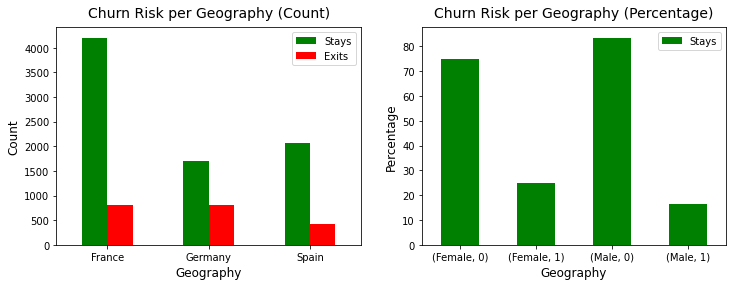

In [17]:
labels= ['Stays', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dfgeoc.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Geography (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Geography', size=12)


dfgeop.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Geography (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Geography', size=12)

plt.show()

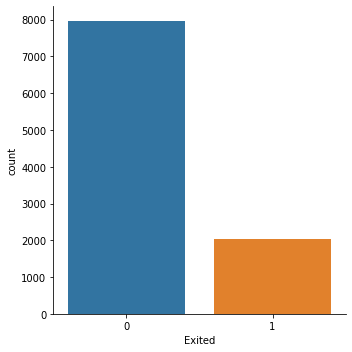

In [18]:
sns.catplot(x='Exited',data=df, kind='count')

## Preprocessing Steps

### Separate the dataset into independent and dependent variables

In [19]:
y = df.Exited
X = df.drop(['Exited'], axis=1)

print(X.shape, y.shape)

(10000, 10) (10000,)


### Encoding Categorical data

In [20]:
dict={'Female':0,'Male':1}
X['Gender'] = X['Gender'].map(dict)
X.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5060,577,France,0,35,4,108155.49,1,1,0,105407.79
9316,550,Germany,1,49,0,108806.96,3,1,0,61446.92
6634,480,France,0,42,1,152160.21,2,1,0,101778.90
3971,685,Spain,1,40,7,74896.92,1,1,0,198694.20
6829,735,France,1,43,9,127806.91,1,1,1,73069.59


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# ct= ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[1])],remainder='passthrough')
# X=np.array(ct.fit_transform(X))

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough', sparse_threshold=0)
X = ct.fit_transform(X)

column_names = ct.get_feature_names_out()  # This will get the new column names after transformation
X = pd.DataFrame(X, columns=column_names)

In [22]:
print(X.head())

   encoder__Geography_France  encoder__Geography_Germany  \
0                        1.0                         0.0   
1                        0.0                         0.0   
2                        1.0                         0.0   
3                        1.0                         0.0   
4                        0.0                         0.0   

   encoder__Geography_Spain  remainder__CreditScore  remainder__Gender  \
0                       0.0                   619.0                0.0   
1                       1.0                   608.0                0.0   
2                       0.0                   502.0                0.0   
3                       0.0                   699.0                0.0   
4                       1.0                   850.0                0.0   

   remainder__Age  remainder__Tenure  remainder__Balance  \
0            42.0                2.0                0.00   
1            41.0                1.0            83807.86   
2            4

In [23]:
X.head()

,encoder__Geography_France,encoder__Geography_Germany,encoder__Geography_Spain,remainder__CreditScore,remainder__Gender,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


### Feature scaling

In [24]:
cols_to_scale = ['remainder__CreditScore', 'remainder__Age', 'remainder__Tenure', 'remainder__Balance', 'remainder__NumOfProducts', 'remainder__EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [25]:
X.head()

,encoder__Geography_France,encoder__Geography_Germany,encoder__Geography_Spain,remainder__CreditScore,remainder__Gender,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary
0,1.0,0.0,0.0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.0,0.0,1.0,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,1.0,0.0,0.0,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,1.0,0.0,0.0,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,0.0,0.0,1.0,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


### SMOTE

In [26]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [28]:
X_sm[:1]

,encoder__Geography_France,encoder__Geography_Germany,encoder__Geography_Spain,remainder__CreditScore,remainder__Gender,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary
0,1.0,0.0,0.0,0.538,0.0,0.324324,0.2,0.0,0.0,1.0,1.0,0.506735


### Spliting Data into Training and Testing

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [30]:
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

## Classification Model

## Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC
svm2=SVC()
svm2.fit(X_train,y_train)

SVC()

In [32]:
ypred=svm2.predict(X_test)
print('accuracy:',metrics.accuracy_score(y_test,ypred))
print('F1 score of svm: ',metrics.f1_score(y_test,ypred,average='weighted'))
print('Jaccard Score of svm: ',metrics.jaccard_score(y_test,ypred))

accuracy: 0.7677338355304457
F1 score of svm:  0.7673927593838498
Jaccard Score of svm:  0.6109358569926393


In [33]:
from sklearn.model_selection import GridSearchCV
svm_clf = {'C':[1,10,20,57],
           'gamma':[1,0.01,0.03,0.07],
           'kernel':['poly','rbf','sigmoid'],
            }

svm_grid = GridSearchCV(SVC(),svm_clf,refit=True,verbose=2)
svm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   6.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   6.2s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   6.5s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   6.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   5.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   5.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   4.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   4.7s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   4.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   4.4s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   5.5s
[CV] END .......................C=1, gamma=1, k

[CV] END ...................C=10, gamma=0.03, kernel=sigmoid; total time=   4.0s
[CV] END ...................C=10, gamma=0.03, kernel=sigmoid; total time=   3.9s
[CV] END ...................C=10, gamma=0.03, kernel=sigmoid; total time=   3.9s
[CV] END ...................C=10, gamma=0.03, kernel=sigmoid; total time=   3.9s
[CV] END ......................C=10, gamma=0.07, kernel=poly; total time=   2.9s
[CV] END ......................C=10, gamma=0.07, kernel=poly; total time=   2.9s
[CV] END ......................C=10, gamma=0.07, kernel=poly; total time=   3.0s
[CV] END ......................C=10, gamma=0.07, kernel=poly; total time=   3.1s
[CV] END ......................C=10, gamma=0.07, kernel=poly; total time=   2.9s
[CV] END .......................C=10, gamma=0.07, kernel=rbf; total time=   4.7s
[CV] END .......................C=10, gamma=0.07, kernel=rbf; total time=   5.0s
[CV] END .......................C=10, gamma=0.07, kernel=rbf; total time=   4.8s
[CV] END ...................

[CV] END .......................C=57, gamma=0.01, kernel=rbf; total time=   5.1s
[CV] END .......................C=57, gamma=0.01, kernel=rbf; total time=   5.1s
[CV] END ...................C=57, gamma=0.01, kernel=sigmoid; total time=   4.2s
[CV] END ...................C=57, gamma=0.01, kernel=sigmoid; total time=   4.0s
[CV] END ...................C=57, gamma=0.01, kernel=sigmoid; total time=   3.7s
[CV] END ...................C=57, gamma=0.01, kernel=sigmoid; total time=   3.8s
[CV] END ...................C=57, gamma=0.01, kernel=sigmoid; total time=   4.2s
[CV] END ......................C=57, gamma=0.03, kernel=poly; total time=   3.0s
[CV] END ......................C=57, gamma=0.03, kernel=poly; total time=   3.1s
[CV] END ......................C=57, gamma=0.03, kernel=poly; total time=   3.1s
[CV] END ......................C=57, gamma=0.03, kernel=poly; total time=   3.0s
[CV] END ......................C=57, gamma=0.03, kernel=poly; total time=   3.1s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20, 57], 'gamma': [1, 0.01, 0.03, 0.07],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=2)

In [34]:
print("Tuned Parameters: ",svm_grid.best_params_)
print("Accuracy : ", svm_grid.best_score_)

Tuned Parameters:  {'C': 57, 'gamma': 1, 'kernel': 'rbf'}
Accuracy :  0.8395604395604395


In [35]:
svm=SVC(C=57,kernel='rbf',gamma=1,probability=True)
print(svm)

SVC(C=57, gamma=1, probability=True)


In [36]:
svm.fit(X_train,y_train)

SVC(C=57, gamma=1, probability=True)

In [37]:
svm_ypred = svm.predict(X_test)
svm_accuracy=metrics.accuracy_score(y_test,svm_ypred)
svm_f1_score=metrics.f1_score(y_test,svm_ypred,average='weighted')
svm_jaccard_score=metrics.jaccard_score(y_test,svm_ypred,pos_label=0)

print('Accuracy of svm: ',svm_accuracy)
print('F1 score of svm: ',svm_f1_score)
print('Jaccard Score of svm: ',svm_jaccard_score)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, y_test)))

Accuracy of svm:  0.8440050219711237
F1 score of svm:  0.8438886143160222
Jaccard Score of svm:  0.7235817575083426
The accuracy of the svm classifier on training data is 0.89 out of 1
The accuracy of the svm classifier on test data is 0.84 out of 1


### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_predlr = logreg.predict(X_test)

In [39]:
lraccuracy=metrics.accuracy_score(y_test,y_predlr)
lrf1_score=metrics.f1_score(y_test,y_predlr,average='weighted')
lrjaccard_score=metrics.jaccard_score(y_test,y_predlr,pos_label=0)

print('Accuracy of LR: ',lraccuracy)
print('F1 score of LR: ',lrf1_score)
print('Jaccard Score of LR: ',lrjaccard_score)

Accuracy of LR:  0.697112366603892
F1 score of LR:  0.6969444269480909
Jaccard Score of LR:  0.5433033601514434


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lrParameters={
    'penalty':['l1','l2'],
    'C':np.logspace(3,5,7),
    'solver':['lbfgs', 'liblinear', 'newton-cg']
}
lr=LogisticRegression()
lr_grid = GridSearchCV(lr,lrParameters,scoring='accuracy',cv=5)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([  1000.        ,   2154.43469003,   4641.58883361,  10000.        ,
        21544.34690032,  46415.88833613, 100000.        ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [41]:
print("Tunned Parmeter : ", lr_grid.best_params_)
print("Accuracy :",lr_grid.best_score_)

Tunned Parmeter :  {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.7131868131868132


In [42]:
log_reg_tunned = lr_grid.best_estimator_
log_reg_tunned.fit(X_train,y_train)

LogisticRegression(C=1000.0, penalty='l1', solver='liblinear')

In [44]:
lr_predicted=log_reg_tunned.predict(X_test)
lr_accuracy=metrics.accuracy_score(y_test,lr_predicted)
lr_f1_score=metrics.f1_score(y_test,lr_predicted,average='weighted')
lr_jaccard_score=metrics.jaccard_score(y_test,lr_predicted,pos_label=0)

print('Accuracy of LR: ',lr_accuracy)
print('F1 score of LR: ',lr_f1_score)
print('Jaccard Score of LR: ',lr_jaccard_score)

Accuracy of LR:  0.6980539861895794
F1 score of LR:  0.6978910057249199
Jaccard Score of LR:  0.5442918048318333


### Hyperparameter tunning for RandomForestClassifier and DecisionTreeClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
model_param={
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[10,25,30,50,100,200],
            'max_depth': [2,3,5,10,20],
            'min_samples_leaf': [5,10,20,50,100,200]
        }
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion':['gini','entropy'],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[6,7,8,9],
            'ccp_alpha': [0.1, .01, .001]
        }
    }
}

In [47]:
scores=[]
for model_name,mp in model_param.items():
    clf=GridSearchCV(mp['model'], mp['params'])
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [48]:
scores

[{'model': 'random_forest',
  'best_score': 0.863657770800628,
  'best_params': {'max_depth': 20,
   'min_samples_leaf': 5,
   'n_estimators': 100}},
 {'model': 'decision_tree',
  'best_score': 0.783751962323391,
  'best_params': {'ccp_alpha': 0.001,
   'criterion': 'entropy',
   'max_depth': 8,
   'max_features': 'auto'}}]

### Random Forest Classifier

In [49]:
rf_classifier = RandomForestClassifier(max_depth= 20,
   min_samples_leaf= 5,
   n_estimators= 100)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5)

In [50]:
rf_ypred = rf_classifier.predict(X_test)

rf_accuracy=metrics.accuracy_score(y_test,rf_ypred)
rf_f1_score=metrics.f1_score(y_test,rf_ypred,average='weighted')
rf_jaccard_score=metrics.jaccard_score(y_test,rf_ypred,pos_label=0)

print('Accuracy of Random Forest: ',rf_accuracy)
print('F1 score of Random Forest: ',rf_f1_score)
print('Jaccard Score of Random Forest: ',rf_jaccard_score)

Accuracy of Random Forest:  0.8772755806654112
F1 score of Random Forest:  0.8772746013379615
Jaccard Score of Random Forest:  0.780829596412556


### Decision Tree Classifier

In [51]:
dt_classifier = DecisionTreeClassifier(ccp_alpha= 0.001,
   criterion= 'entropy',
   max_depth= 8,
   max_features= 'auto')
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto')

In [52]:
dt_ypred = dt_classifier.predict(X_test)

dt_accuracy=metrics.accuracy_score(y_test,dt_ypred)
dt_f1_score=metrics.f1_score(y_test,dt_ypred,average='weighted')
dt_jaccard_score=metrics.jaccard_score(y_test,dt_ypred,pos_label=0)

print('Accuracy of Decision Tree: ',dt_accuracy)
print('F1 score of Decision Tree: ',dt_f1_score)
print('Jaccard Score of  Decision Tree: ',dt_jaccard_score)

Accuracy of Decision Tree:  0.7919020715630886
F1 score of Decision Tree:  0.7919010670065366
Jaccard Score of  Decision Tree:  0.6561203319502075


### XGBoost Classifier

In [56]:
!pip install xgboost

     -------------------------------------- 99.8/99.8 MB 637.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import xgboost as xgb
param_grid = {'xgbclassifier__gamma': [0.5, 0.8, 1],
              'xgbclassifier__max_depth': [3, 4, 5, 6],
              'xgbclassifier__n_estimators': [50, 100, 200]
        }
grid = GridSearchCV(xgb.XGBClassifier(), param_grid, verbose=3, cv= 5, n_jobs=4, scoring='f1_macro')

In [60]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'xgbclassifier__gamma': [0.5, 0.8, 1],
                         'xgbclassifier__max_depth': [3, 4, 5, 6],
                         'xgbclassifier__n_estimators': [50, 100, 200]},
             scoring='f1_macro', verbose=3)

In [61]:
print(grid.best_params_)

{'xgbclassifier__gamma': 0.5, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 50}


In [62]:
print(grid.best_score_)

0.895072209629163


In [65]:
xgbClassifier=grid.best_estimator_
xgbClassifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
xgbClassifier_predicted=xgbClassifier.predict(X_test)
xgbClassifier_accuracy=metrics.accuracy_score(y_test,xgbClassifier_predicted)
xgbClassifier_f1_score=metrics.f1_score(y_test,xgbClassifier_predicted,average='weighted')
xgbClassifier_jaccard_score=metrics.jaccard_score(y_test,xgbClassifier_predicted,pos_label=0)

print('Accuracy of xgbClassifier: ',xgbClassifier_accuracy)
print('F1 score of xgbClassifier: ',xgbClassifier_f1_score)
print('Jaccard Score of xgbClassifier: ',xgbClassifier_jaccard_score)

Accuracy of xgbClassifier:  0.9023854362837413
F1 score of xgbClassifier:  0.9023125936665654
Jaccard Score of xgbClassifier:  0.8264508928571429


### KNN classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
kn_param_grid = {
    'n_neighbors' : [1, 2, 3, 4, 5],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
kn_grid = GridSearchCV(KNeighborsClassifier(), kn_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [72]:
kn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.880 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.892 total time=   0.3s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.878 total time=   0.3s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.876 total time=   0.3s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.863 total time=   0.3s
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.880 total time=   0.2s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.892 total time=   0.2s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.878 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.876 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.863 total time=   0.1s
[CV

[CV 2/5] END algorithm=ball_tree, n_neighbors=4, weights=distance;, score=0.872 total time=   0.3s
[CV 3/5] END algorithm=ball_tree, n_neighbors=4, weights=distance;, score=0.867 total time=   0.3s
[CV 4/5] END algorithm=ball_tree, n_neighbors=4, weights=distance;, score=0.858 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, n_neighbors=4, weights=distance;, score=0.844 total time=   0.3s
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.825 total time=   0.4s
[CV 2/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.827 total time=   0.4s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.822 total time=   0.4s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.823 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.816 total time=   0.5s
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.850 total time=   0.3s
[CV 2/5] END al

[CV 3/5] END algorithm=brute, n_neighbors=3, weights=uniform;, score=0.846 total time=   0.1s
[CV 4/5] END algorithm=brute, n_neighbors=3, weights=uniform;, score=0.839 total time=   0.1s
[CV 5/5] END algorithm=brute, n_neighbors=3, weights=uniform;, score=0.825 total time=   0.1s
[CV 1/5] END algorithm=brute, n_neighbors=3, weights=distance;, score=0.856 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=3, weights=distance;, score=0.868 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=3, weights=distance;, score=0.859 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=3, weights=distance;, score=0.849 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=3, weights=distance;, score=0.839 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=4, weights=uniform;, score=0.835 total time=   0.1s
[CV 2/5] END algorithm=brute, n_neighbors=4, weights=uniform;, score=0.843 total time=   0.1s
[CV 3/5] END algorithm=brute, n_neighbors=4, weights=un

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [74]:
knnClassifier=kn_grid.best_estimator_
knnClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [75]:
knnClassifier_predicted=knnClassifier.predict(X_test)
knnClassifier_accuracy=metrics.accuracy_score(y_test,knnClassifier_predicted)
knnClassifier_f1_score=metrics.f1_score(y_test,knnClassifier_predicted,average='weighted')
knnClassifier_jaccard_score=metrics.jaccard_score(y_test,knnClassifier_predicted,pos_label=0)

print('Accuracy of knnClassifier: ',knnClassifier_accuracy)
print('F1 score of knnClassifier: ',knnClassifier_f1_score)
print('Jaccard Score of knnClassifier: ',knnClassifier_jaccard_score)

Accuracy of knnClassifier:  0.8913998744507219
F1 score of knnClassifier:  0.8908506542885207
Jaccard Score of knnClassifier:  0.7906836055656382


### Model Evaluation

In [76]:
result = pd.DataFrame({
    'Model': ['SVM','Logistic Regression','Random Forest','Decision Tree','XG Boost','KNN'],
    'Jaccard Score':[svm_jaccard_score,lrjaccard_score,rf_jaccard_score,dt_jaccard_score,xgbClassifier_jaccard_score,knnClassifier_jaccard_score],
    'F1 Score': [svm_f1_score,lrf1_score,rf_f1_score,dt_f1_score,xgbClassifier_f1_score,knnClassifier_f1_score],
    'Accuracy': [svm_accuracy,lraccuracy,rf_accuracy,dt_accuracy,xgbClassifier_accuracy,knnClassifier_accuracy]
})

In [77]:
result

,Model,Jaccard Score,F1 Score,Accuracy
0,SVM,0.723582,0.843889,0.844005
1,Logistic Regression,0.543303,0.696944,0.697112
2,Random Forest,0.780830,0.877275,0.877276
3,Decision Tree,0.656120,0.791901,0.791902
4,XG Boost,0.826451,0.902313,0.902385
5,KNN,0.790684,0.890851,0.891400


### K-fold cross validation

In [82]:
from sklearn import model_selection
seed=7
models=[]
models.append(('SVM',svm))
models.append(('Logistic Regression',log_reg_tunned))
models.append(('Random Forest',rf_classifier))
models.append(('Decision Tree',dt_classifier))
models.append(('XGB Classifier',xgbClassifier))
models.append(('KNN Classifier',knnClassifier))
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)

In [83]:
for i in range(len(names)):
    cv_result_arr=np.array(results[i])
    print(names[i],":",np.mean(cv_result_arr))

SVM : 0.8383045525902668
Logistic Regression : 0.71287284144427
Random Forest : 0.8684458398744113
Decision Tree : 0.7725274725274726
XGB Classifier : 0.8974097331240187
KNN Classifier : 0.8845368916797488


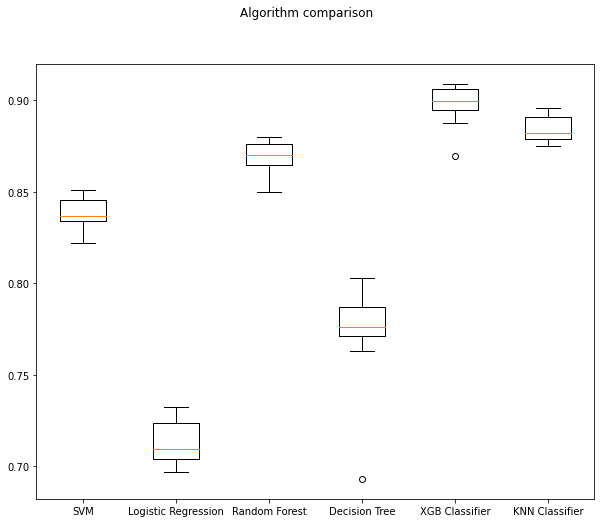

In [84]:
fig=plt.figure(figsize=(10,8))

fig.suptitle('Algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### XGB Classifier

In [86]:
from sklearn.metrics import confusion_matrix
cmXGB = confusion_matrix(y_test, xgbClassifier_predicted)
print(cmXGB)

[[1481  112]
 [ 199 1394]]


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgbClassifier_predicted))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1593
           1       0.93      0.88      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



### KNN Classifier

In [90]:
cmKNN = confusion_matrix(y_test, knnClassifier_predicted)
print(cmKNN)

[[1307  286]
 [  60 1533]]


In [91]:
print(classification_report(y_test, knnClassifier_predicted))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1593
           1       0.84      0.96      0.90      1593

    accuracy                           0.89      3186
   macro avg       0.90      0.89      0.89      3186
weighted avg       0.90      0.89      0.89      3186



### Plotting ROC_AUC Curve

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score
classifiers = [svm,log_reg_tunned,rf_classifier,dt_classifier,xgbClassifier,knnClassifier]
model=['SVM','Logistic Regression','Random Forest','Decision Tree','XGB Classifier','KNN']
result_table = pd.DataFrame(columns=['model','fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(X_train,y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr,tpr, _=roc_curve(y_test,yproba)
    auc = roc_auc_score(y_test,yproba)
    result_table = result_table.append({
        'model':cls.__class__.__name__,
        'fpr':fpr,
        'tpr':tpr,
        'auc':auc
    },ignore_index=True)
result_table.set_index('model',inplace=True)

In [93]:
print(result_table)

                                                                      fpr  \
model                                                                       
SVC                     [0.0, 0.0, 0.0, 0.0006277463904582549, 0.00062...   
LogisticRegression      [0.0, 0.0, 0.0, 0.0006277463904582549, 0.00062...   
RandomForestClassifier  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
DecisionTreeClassifier  [0.0, 0.0006277463904582549, 0.001883239171374...   
XGBClassifier           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
KNeighborsClassifier                      [0.0, 0.17953546767106088, 1.0]   

                                                                      tpr  \
model                                                                       
SVC                     [0.0, 0.0006277463904582549, 0.053358443188951...   
LogisticRegression      [0.0, 0.0006277463904582549, 0.005021971123666...   
RandomForestClassifier  [0.0, 0.0006277463904582549, 0.026365348399246...  

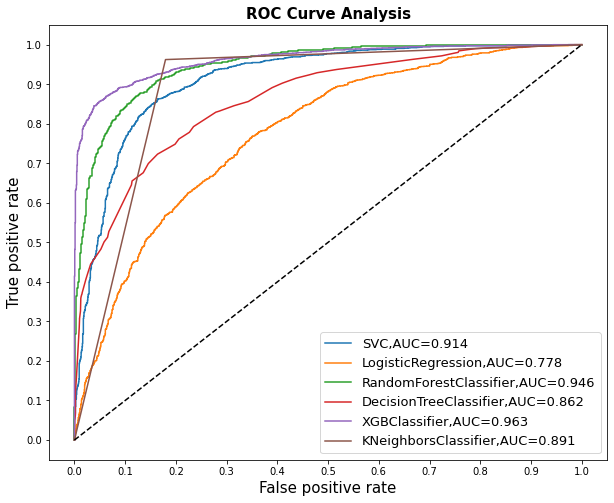

In [94]:
fig=plt.figure(figsize=(10,8))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
            result_table.loc[i]['tpr'],
            label="{},AUC={:.3f}".format(i,result_table.loc[i]['auc']))
plt.plot([0,1],[0,1],color='black',linestyle='--')

plt.xticks(np.arange(0.0,1.1,step=0.1))
plt.xlabel("False positive rate",fontsize=15)

plt.yticks(np.arange(0.0,1.1,step=0.1))
plt.ylabel("True positive rate",fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold',fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Save model 

In [95]:
import joblib

joblib.dump(xgbClassifier, 'xgb_classifier_model.pkl')

['xgb_classifier_model.pkl']

In [116]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Load the saved model from file


In [96]:
xgbClassifier_loaded = joblib.load('xgb_classifier_model.pkl')

In [105]:
X_sm[:1]

,encoder__Geography_France,encoder__Geography_Germany,encoder__Geography_Spain,remainder__CreditScore,remainder__Gender,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary
0,1.0,0.0,0.0,0.538,0.0,0.324324,0.2,0.0,0.0,1.0,1.0,0.506735


In [106]:
y_sm[:1]

0    1
Name: Exited, dtype: int64

In [104]:
y_pred_loaded = xgbClassifier_loaded.predict([[1.0,0.0,0.0,0.538,0.0,0.324324,0.2,0.0,0.0,1.0,1.0,0.506735]])

In [100]:
y_pred_loaded

array([1])